In [1]:
import numpy as np
import matplotlib.pyplot as plt
from homework_functions import example_f, problem_5_solver, problem_6_solver, dat_reader, error_1,error_2
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = 'Times New Roman'


In [2]:
Ns = [5, 10, 20, 40, 80, 160, 320, 640, 1280]
h_values = []
E_1 = []
e_1 = []
E_2 = []
e_2 = []

exact_x, exact_u = dat_reader('solutionB_N10000.dat')

for N in Ns:
    h_values.append(1/(N+1))
    # problem 5 solver
    x,u = problem_5_solver(0,10,1,2,N, example_f)
    problem_5_E = float(error_1(x,u,exact_x,exact_u))
    problem_5_e = float(error_2(x,u,exact_x,exact_u,N))

    # problem 6 soler
    x,u = problem_6_solver(0,10,1,2,N, example_f)
    problem_6_E = float(error_1(x,u,exact_x,exact_u))
    problem_6_e = float(error_2(x,u,exact_x,exact_u,N))

    # append all data
    E_1.append(problem_5_E)
    e_1.append(problem_5_e)
    E_2.append(problem_6_E)
    e_2.append(problem_6_e)

2.15085118095239
3.1781145188855717
0.5242809860647357
1.5515443239979172


Text(0, 0.5, 'Error')

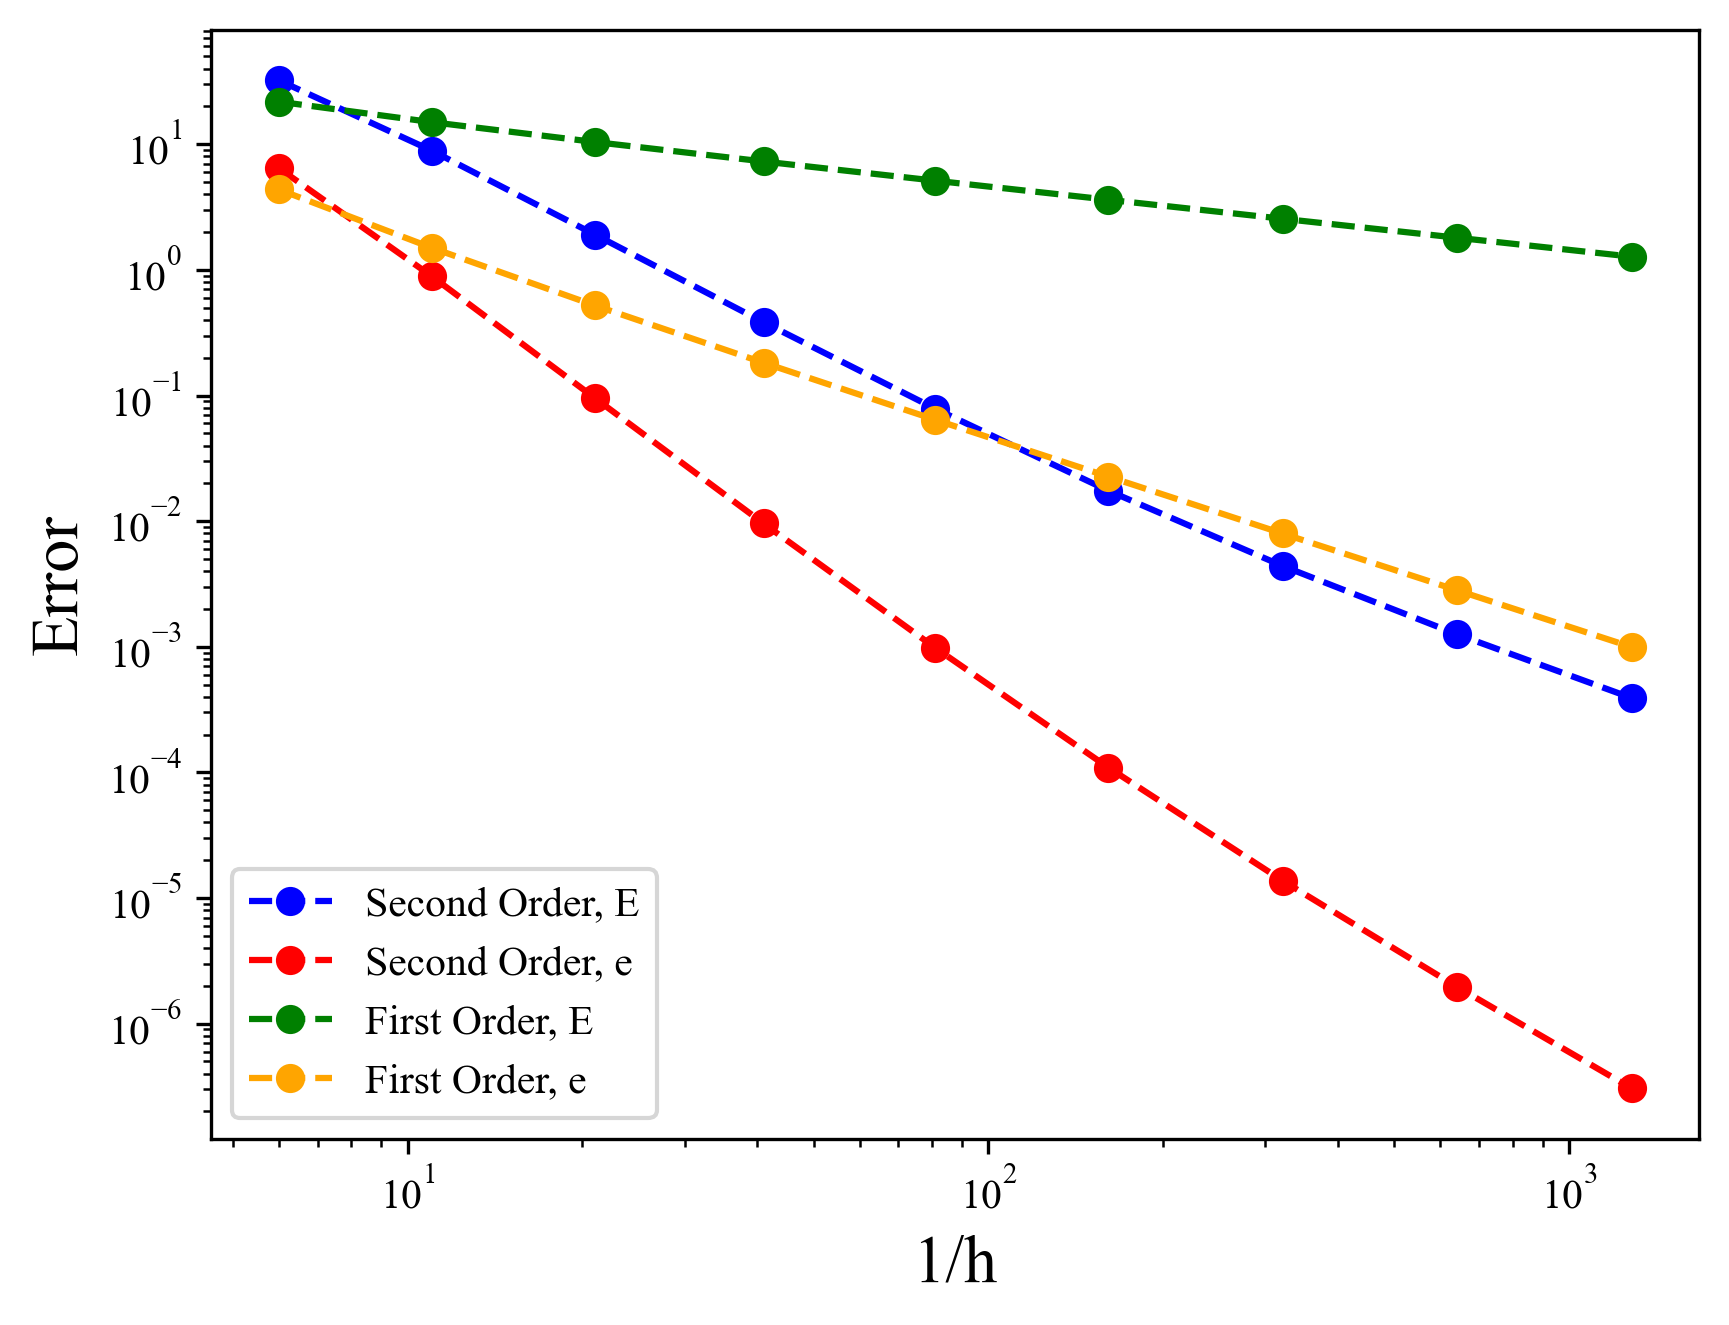

In [3]:
one_over_h = [1/h for h in h_values]

plt.loglog(one_over_h, E_1, '--o', label = 'Second Order, E', color = 'blue')
plt.loglog(one_over_h, e_1, '--o', label = 'Second Order, e', color = 'red')
plt.loglog(one_over_h, E_2, '--o', label = 'First Order, E', color = 'green')
plt.loglog(one_over_h, e_2, '--o', label = 'First Order, e', color = 'orange')

for error in [E_1,e_1,E_2,e_2]:
    alpha, logC = np.polyfit(np.log(h_values), np.log(error), deg = 1)
    print(alpha)


plt.legend()
plt.xlabel("1/h",fontsize = 16)
plt.ylabel("Error",fontsize = 16)